In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 

In [7]:
import os, shutil

In [10]:
original_dataset_dir = "C:/Users/Desktop/Assignment/rose_and_sunflower"

In [11]:
base_dir =  "C:/Users/Desktop/Assignment/rose_and_sunflower/classification_rose_vs_sunflower"
os.mkdir(base_dir)

In [12]:
# Directories for the training, validation, and test splits

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [13]:
# Directory with training rose pictures

train_rose_dir = os.path.join(train_dir, 'rose')
os.mkdir(train_rose_dir)

In [14]:
# Directory with training sunflower pictures

train_sunflower_dir = os.path.join(train_dir, 'sunflower')
os.mkdir(train_sunflower_dir)

In [15]:
# Directory with validation rose pictures

validation_rose_dir = os.path.join(validation_dir, 'rose')
os.mkdir(validation_rose_dir)

In [16]:
# Directory with validation sunflower pictures

validation_sunflower_dir = os.path.join(validation_dir, 'sunflower')
os.mkdir(validation_sunflower_dir)

In [17]:
# Directory with test rose pictures

test_rose_dir = os.path.join(test_dir, 'rose')
os.mkdir(test_rose_dir)

In [44]:
# Directory with test sunflower pictures

test_sunflower_dir = os.path.join(test_dir, 'sunflower')
os.mkdir(test_sunflower_dir)

In [45]:
# Copies the first 434 rose images to train_rose_dir

fnames = ['rose.{}.jpg'.format(i) for i in range(1,435)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_rose_dir, fname)
    shutil.copyfile(src, dst)

In [46]:
# Copies the 175 rose images to validation_cats_dir
fnames = ['rose.{}.jpg'.format(i) for i in range(435, 610)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_rose_dir, fname)
    shutil.copyfile(src, dst)

In [47]:
#  Copies the next 175 rose images to test_cats_dir

fnames = ['rose.{}.jpg'.format(i) for i in range(610, 785)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_rose_dir, fname)
    shutil.copyfile(src, dst)

In [48]:
# Copies the first 432 sunflower images to train_sunflower_dir

fnames = ['sunflower.{}.jpg'.format(i) for i in range(1, 433)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_sunflower_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 150 sunflower images to validation_sunflower_dir    

fnames = ['sunflower.{}.jpg'.format(i) for i in range(433, 587)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_sunflower_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 150 sunflower images to test_sunflower_dir    

fnames = ['sunflower.{}.jpg'.format(i) for i in range(587, 733) ]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_sunflower_dir, fname)
    shutil.copyfile(src, dst)

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [55]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [59]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
         target_size=(150, 150),
         batch_size=20,
         class_mode='binary')

Found 866 images belonging to 2 classes.
Found 329 images belonging to 2 classes.


In [60]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 79s 792ms/step - loss: 0.3626 - acc: 0.8386 - val_loss: 0.1329 - val_acc: 0.8793
Epoch 2/30
100/100 [==============================] - 80s 798ms/step - loss: 0.2462 - acc: 0.9028 - val_loss: 0.1349 - val_acc: 0.8821
Epoch 3/30
100/100 [==============================] - 81s 807ms/step - loss: 0.2281 - acc: 0.9065 - val_loss: 0.4723 - val_acc: 0.8780
Epoch 4/30
100/100 [==============================] - 87s 866ms/step - loss: 0.1790 - acc: 0.9320 - val_loss: 0.1242 - val_acc: 0.8945
Epoch 5/30
100/100 [==============================] - 82s 823ms/step - loss: 0.1667 - acc: 0.9275 - val_loss: 0.0925 - val_acc: 0.8800
Epoch 6/30
100/100 [==============================] - 78s 781ms/step - loss: 0.1294 - acc: 0.9523 - val_loss: 0.2002 - val_acc: 0.9193
Epoch 7/30
100/100 [==============================] - 75s 748ms/step - loss: 0.1200 - acc: 0.9520 - val_loss: 0.1899 - val_acc: 0.9100
Epoch 8/30
100/100 [==============================] - 7

In [62]:
# Saving the model

model.save('rose_vs_sunflower_1.h5')

In [ ]:
# Displaying curves of loss and accuracy during training

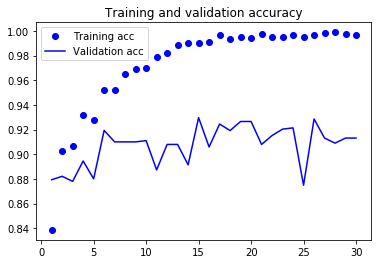

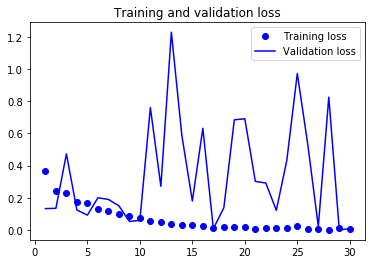

In [63]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()